In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LinearRegression
%matplotlib inline
from statsmodels.formula.api import ols
import numpy as np
import src
import random


In [75]:
df = pd.read_csv('data_with_all_features.csv')

In [76]:
df.head()

,Unnamed: 0,Unnamed: 0.1,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,...,month,fall,winter,spring,summer,sqft_expensive_waterfront,bathroom_sqft,sqft_view,price_log,sqft_waterfront
0,0,0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,...,10,1,0,0,0,0,9641025.0,0,12.807653,0
1,1,7,7010701383,20141017T000000,680000.0,3,2.50,1800,4400,1.0,...,10,1,0,0,0,0,8100000.0,0,13.429848,0
2,2,17,2386000070,20141029T000000,795127.0,4,3.25,4360,91158,1.0,...,10,1,0,0,0,0,61781200.0,0,13.586257,0
3,3,18,1138000450,20141016T000000,355000.0,4,1.00,1440,7215,1.5,...,10,1,0,0,0,0,2073600.0,0,12.779873,0
4,4,23,9324800450,20141009T000000,560000.0,3,1.50,2790,6900,1.0,...,10,1,0,0,0,0,11676150.0,15568200,13.235692,0


In [78]:
factors = """zipcode_98004+zipcode_98005 +
                            zipcode_98006+zipcode_98007+zipcode_98008+zipcode_98010 
                            +zipcode_98011+zipcode_98014+zipcode_98019 
                            +zipcode_98024+zipcode_98027+zipcode_98028 
                            +zipcode_98029+
                            +zipcode_98033+zipcode_98034+zipcode_98039 
                            +zipcode_98040+zipcode_98045+zipcode_98052 
                            +zipcode_98053+zipcode_98056
                            +zipcode_98059+zipcode_98065+zipcode_98072 
                            +zipcode_98074+zipcode_98075+zipcode_98077+zipcode_98092 
                            +zipcode_98102+zipcode_98103+zipcode_98105 
                            +zipcode_98107+zipcode_98108+zipcode_98109+zipcode_98112 
                            +zipcode_98115+zipcode_98116+zipcode_98117+zipcode_98118 
                            +zipcode_98119+zipcode_98122+zipcode_98125+zipcode_98126 
                            +zipcode_98133+zipcode_98136+zipcode_98144+zipcode_98146 
                            +zipcode_98155+zipcode_98166 
                            +zipcode_98177+zipcode_98199+sq_sqft
                            +grade_3
                            +grade_4+grade_5+grade_6+grade_7+grade_8+grade_9+grade_10+grade_11+grade_12+waterfront"""
factors = factors.replace(' ', '')
factors = factors.replace('\n', '')
factors = factors.split('+')
factors.remove('' )
df[factors]

,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98024,...,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,waterfront
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17285,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
17286,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
17287,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
17288,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df[factors], test_size=0.2, random_state=42)

In [ ]:
target = df['price']

target

In [ ]:
#improt train_test_split from sklearn package
from sklearn.model_selection import train_test_split

#call train_test_split on the data and capture the results
X_train, X_test, y_train, y_test = train_test_split(df[factors], target, random_state=34,test_size=0.2)

#check the shape of the results
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Training set - Features: ", X_test.shape, "Target: ",y_test.shape)


In [ ]:
from sklearn import linear_model

#instantiate a linear regression object
lm = linear_model.LinearRegression()

#fit the linear regression to the data
lm = lm.fit(X_train, y_train)


print(lm.intercept_)
print(lm.coef_)

In [ ]:
y_train_pred = (lm.predict(X_train))
y_test_pred = (lm.predict(X_test))
print ("R^2 Score:", lm.score(X_train, y_train))


In [ ]:
from sklearn import metrics

train_mae = metrics.mean_absolute_error((y_train), y_train_pred)
train_mse = metrics.mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(metrics.mean_squared_error((y_train), y_train_pred))


print('Mean Absolute Error:', train_mae )
print('Mean Squared Error:',  train_mse)
print('Root Mean Squared Error:' , train_rmse)

In [ ]:
test_mae = metrics.mean_absolute_error((y_test), y_test_pred)
test_mse = metrics.mean_squared_error((y_test), y_test_pred)
test_rmse = np.sqrt(metrics.mean_squared_error((y_test), y_test_pred))


print('Mean Absolute Error:', test_mae )
print('Mean Squared Error:',  test_mse)
print('Root Mean Squared Error:' , test_rmse)

In [ ]:
residuals = (y_test- y_test_pred)

In [ ]:
plt.hist(residuals)

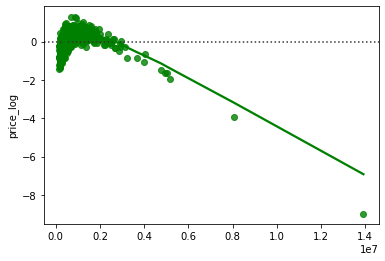

In [77]:
sns.residplot(y_test_pred, (y_test), lowess=True, color="g")